# Исследование объявлений о продаже квартир

В проекте представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Целью данного проекта является выявления зависимости цен квартир от различных параметров. Задачи - предобработка данных о квартирах, выбор характеристик для проведения исследования и автоматизировать процесс построения гистограмм частот и графиков зависимости.

Для исследования объявлений о продаже квартир необходимо провести следующие действия:
- Открытие и визуальный осмотр файла с данными;
- Расчет (цены квадратного метра, отношения жилой и общей площади, отношения площади кухни к общей)  и группировака (по дате побликации и типу этажа) характеристик квартиры;
- Исследование распределения объявлений по различным характеристикам площади, числа комнат, цены, высоты потолков, времяни продажи квартиры. 
- Исследование влияния различных характеристик (площадь, удаленность от центра, этажа, числа комнат, даты размещения) на цену квартир;
- Формулировка выводов по результатам исследования, выявление параметров наиболее влияющих на цену квартир.

## Оглавление
1. [Открытие данных](#start)
2. [Предобработка данных](#processing_data)
3. [Посчитайте и добавьте в таблицу](#new_data)
4. [Исследовательский анализ данных](#analyse)
5. [Общий вывод](#conclusion)

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="start"></a> 

In [1]:
#Открытие библиотек
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
#Открытие датафрейма
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Проблемы обнаруженные в таблице:
1. Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. Для некоторых столбцов пропуск значений имеет смысл (balcony, parks_around3000, ponds_around3000), т.е. здесь пустые строки обозначают отсутствие балконов в квартире и отсутсвие парков и прудов в радиусе 3-х км. Для других пропуск значений является бессмысленным (kitchen_area, cityCenters_nearest, days_exposition, celing_height, floors_total, living_area, is_apartment, locality_name, airports_nearest, parks_nearest, ponds_nearest), т.е. здесь пустые строки свидетельствуют о ошибках при заполнении или потере данных. В первом случае пустые значения можно заменить нулями, во втором случае пустые строки оставим без изменений, т.к. нет принципа по которому можно заполнить данные столбцы;
2. Столбцы с вещественным типом данных float, которые необходимо перевести в целочисленный int;
3. Некторым столбцам с типом данных object соотвествует другой тип. Необходимо перевести их к соответствуюшему типу данных, кроме столбца locality_name. Столбец first_day_exposition перевести к типу даты, столбец is_apartment к типу bool.

### Шаг 2. Предобработка данных<a id="processing_data"></a> 

Проверим наличие пустых значений методом isnull и sum

In [5]:
#выявление пропусков методом isnull и sum
df_null = df.isnull().sum()
df_null

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Процент нулей
df_null_p = df_null/len(df)*100
df_null_p[df_null_p>0] #выведим только столбцы с пропусками

ceiling_height         38.799105
floors_total            0.362885
living_area             8.029875
is_apartment           88.290645
kitchen_area            9.612220
balcony                48.605426
locality_name           0.206760
airports_nearest       23.384953
cityCenters_nearest    23.287902
parks_around3000       23.283683
parks_nearest          65.909954
ponds_around3000       23.283683
ponds_nearest          61.559559
days_exposition        13.422507
dtype: float64

Заменим нулями пустые значения в тех столбцах, в которых это имеет смысл

In [7]:
#Заменим пропущенные значений нулями
df['balcony'] = df['balcony'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

Заменим типы даных сталбцов

В данном пункте:
- переведем тип данных с float на int для некоторых столбцов, и назначим столбцу с датой тип даты;
- ограничим размерность для типов float и int;
- заменим тип данных object на category;
- посчитаем размер таблицы до и после оптимизации.

In [8]:
#Размер таблицы в Мб и используемые типы данных
df.info(memory_usage='deep',verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Columns: 22 entries, total_images to days_exposition
dtypes: bool(2), float64(14), int64(3), object(3)
memory usage: 8.1 MB


In [9]:
#Замена типа данных на int
optimized_df = df.copy()

optimized_df['last_price'] = optimized_df['last_price'].astype('int')
optimized_df['total_area'] = optimized_df['total_area'].astype('int')
optimized_df['balcony'] = optimized_df['balcony'].astype('int')
optimized_df['parks_around3000'] = optimized_df['parks_around3000'].astype('int')
optimized_df['ponds_around3000'] = optimized_df['ponds_around3000'].astype('int')

#Приведение столбца first_day_exposition к типу даты.
#В данном столбце время для каждой строки является одинаковым, 
#что является ошибкой, следовательно, в нашем случае время не будет учтено
optimized_df['first_day_exposition'] = pd.to_datetime(optimized_df['first_day_exposition'], format = '%Y-%m-%d')


In [10]:
#Расчет среднего показателя использования памяти по разным типам данных
for dtype in ['float','int','object', 'bool','datetime']:
    selected_dtype = optimized_df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Средний показатель использование памяти для столбцов с {}: {:03.2f} MB".format(dtype,mean_usage_mb))

Средний показатель использование памяти для столбцов с float: 0.16 MB
Средний показатель использование памяти для столбцов с int: 0.16 MB
Средний показатель использование памяти для столбцов с object: 1.07 MB
Средний показатель использование памяти для столбцов с bool: 0.02 MB
Средний показатель использование памяти для столбцов с datetime: 0.09 MB


In [11]:
#Функция подсчета размера данных для столбцов с определенным типом данных
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

#Оптимизация столбцов с типом данных int
df_int = optimized_df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

#Вывод размера столбцов
print('Размер столбцов с int до оптимизации:', mem_usage(df_int))
print('Размер столбцов с int после оптимизации:', mem_usage(converted_int))

#Вывод чиса типов int с разной размерностью
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

Размер столбцов с int до оптимизации: 1.45 MB
Размер столбцов с int после оптимизации: 0.27 MB


,before,after
uint8,NaN,6.0
uint16,NaN,1.0
uint32,NaN,1.0
int64,8.0,NaN


In [12]:
#Оптимизация столбцов с типом данных float
df_float = optimized_df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

#Вывод размера столбцов
print('Размер столбцов с float до оптимизации:',mem_usage( df_float))
print('Размер столбцов с float после оптимизации:',mem_usage(converted_float))

#Вывод чиса типов float с разной размерностью
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

Размер столбцов с float до оптимизации: 1.63 MB
Размер столбцов с float после оптимизации: 0.81 MB


,before,after
float32,NaN,9.0
float64,9.0,NaN


In [13]:
#Определение числа уникальных значений в столбцах с типом object
df_obj = optimized_df.select_dtypes(include=['object']).copy()
df_obj.describe()

,is_apartment,locality_name
count,2775,23650
unique,2,364
top,False,Санкт-Петербург
freq,2725,15721


In [14]:
#Перевод столбцов с типом object в тип category 
#при условии, что число уникалных значений в сталбцах с типом object состовлеет менее 50% от длины столбца
converted_obj = pd.DataFrame()

for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

print('Размер столбцов с obj до оптимизации:', mem_usage(df_obj))
print('Размер столбцов с obj после оптимизации:', mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

Размер столбцов с obj до оптимизации: 3.22 MB
Размер столбцов с obj после оптимизации: 0.12 MB


,before,after
object,2.0,NaN
category,NaN,1.0
category,NaN,1.0


In [15]:
#Сравнение размера таблицы до и после оптимизации
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
optimized_df[converted_obj.columns] = converted_obj

print('Размер таблицы до оптимизации:', mem_usage(df))
print('Размер таблицы после оптимизации:', mem_usage(optimized_df))

Размер таблицы до оптимизации: 8.05 MB
Размер таблицы после оптимизации: 1.43 MB


In [16]:
#Сохраним оптимизированный датафрейм в основой таблице
df = optimized_df

### Вывод
Проведя все действия для оптиемезации данных удалось снизить размер таблицы на 6.62 Мб или на 82%.

Столбцы с типом данных float были переведены к типу int, кроме тех в которых были оставлены пустые значения. Также столбец first_day_exposition с типом object переведен к типу datetime64[ns].

В таблице выявлены пустые значения, некоторые из которых заменены на ноль, для остальных пустые значения оставлены, т.к. неизвестно каким должно быть содержимое даных ячеек, а заполнение пустых значений любым способом исказит результаты будующих исследований. Заполнение нулями для каждого столбца имеет следующий смысл:
* balcony - в квартире нет балкона;
* parks_around3000 - в радиусе 3-х км нет ни одного парка;
* ponds_around3000 - в радиусе 3-х км нет ни одного пруда.

Удаление дубликатов

В столбце locality_name встречаются названия с добовлением поселок, деревня и т.п. и без них. Необходимо удалить все добавления, чтобы не остовлять дубликатов.

In [17]:
df['locality_name'] = df['locality_name'].str.replace(r'\b[а-яё]\w+','').str.replace('^\s+','')

### Шаг 3. Посчитайте и добавьте в таблицу<a id="new_data"></a> 

Цена квадратного метра

In [18]:
#Посчитаем цену квадратного метра из отнашения стоймости к общей полщади квартиры и запишем результат в столбец price_per_sq_m
df['price_per_sq_m'] = df['last_price']/df['total_area']

День недели, месяц и год публикации объявления

In [19]:
#День недели публикации
df['day'] = df['first_day_exposition'].dt.day_name()

In [20]:
#Месяц публикации
df['month'] = df['first_day_exposition'].dt.month_name()

In [21]:
#Год публикации
df['year'] = df['first_day_exposition'].dt.year

Этаж квартиры. Варианты — первый, последний, другой.

In [22]:
#Функция для котегоризации этажей
def super_func(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    floors_total = row['floors_total']
    if floors_total == floor:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(super_func, axis=1)

Cоотношение жилой и общей площади

In [23]:
#Отношение жилой площади к общей площади
df['living_vs_total'] = df['living_area']/df['total_area']

Соотношение площади кухни и общей площади

In [24]:
#Отношение площади кухни к общей площади
df['kitchen_vs_total'] = df['kitchen_area']/df['total_area']

### Вывод

В данном шаге посчитаны и добавлены столбцы цены квадратного метра, отношения жилой и общей площади и площади кухни и общей. Также добавлены столбцы дня недели, месеца и года публикации объявления, произведена котегоризация этожей квартир.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a id="analyse"></a>

* Изучение следующих параметров: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [25]:
#Изучим параметры площади, цены, числа комнат, высоты потолков метомом discribe()
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.120511,6.541549e+06,2.070636,2.771499
std,35.665822,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.000000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


In [26]:
#Названия графиков
name = ['Общая площадь', 'Цена', 'Число комнат', 'Высота потолков']
xname = ['Общая площадь, кв.м.', 'Цена, млн', 'Число комнат', 'Высота потолков, м.']
df['last_price'] = df['last_price']/1000000

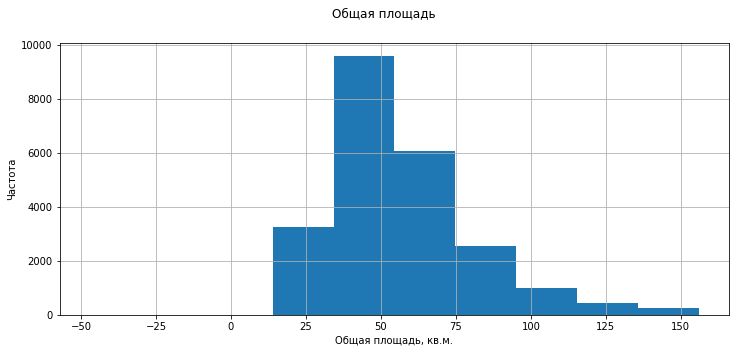

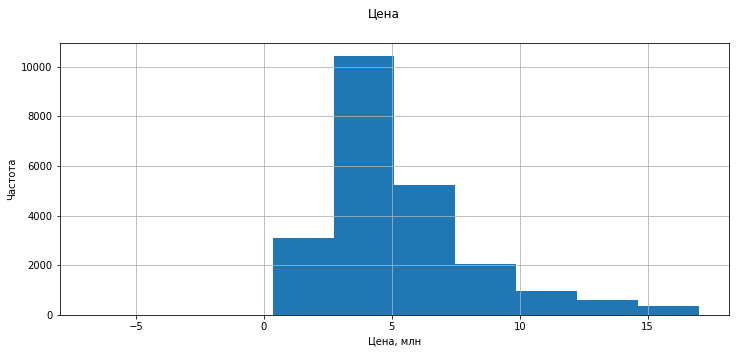

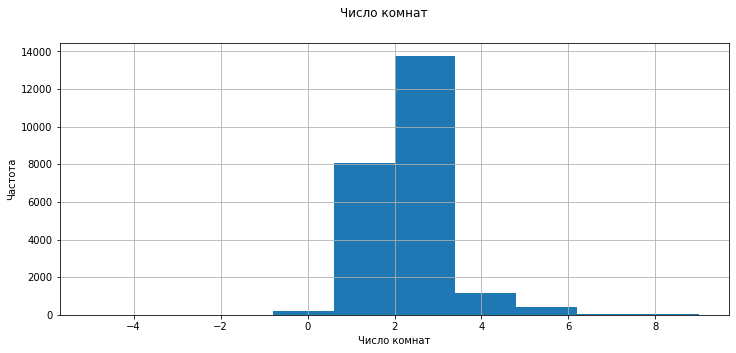

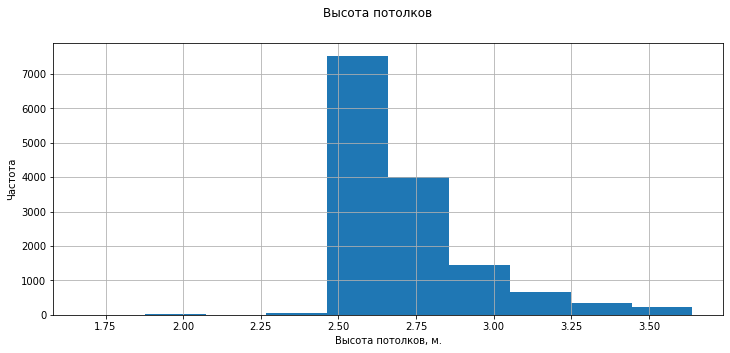

In [27]:
#Цикл графиков
def range_hist(research_group):
    q1 = df[research_group].quantile(0.25)
    q3 = df[research_group].quantile(0.75)
    iqr = q3 - q1
    return df[research_group].hist(range=(q1-3*iqr, q3+3*iqr), 
                                   bins = (10), figsize = (12,5))
i = 0
for research_group in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    range_hist(research_group)
    plt.suptitle(name[i])
    plt.ylabel('Частота')
    plt.xlabel(xname[i])
    i +=1
    plt.show()

По гистограмме общей площади видно, что в правой части графика после 150 кв.м. наблюдается хвост из редких значений площади. Метдом describe() выяснели, что в среднем площадь квартир равна 69 кв.м. Больше всего квартир продано с площадью равной 52 кв.м. Максимальное значение площади равна 900 кв.м.

По гистограмме цен видно, что в правой части графика после 10 млн. наблюдается небольшой хвост. Срденяя цена за квартиру равна 6.5 млн, медианное значение равно 4.65 млн., максимальное значение цены равна 763 млн, минимальное 12 тыс.

По гистограмме числа комнат следует, что существуют квартиры с нулевым значением комнат, что являются ошибкой, также после значения комнат больше 8-ми есть небольшое число квартир (менее 3-х объявлений для каждого значения комнат больше 8-ми). В среднем в каждой квартире всего 2-е комнаты, максимум - 19 комнат.  

В левой части графика наблюдются небольшое число квартир со значением высоты менее 2.5 метра. Среднее значение высоты равно 2.77 метров, медианное - 2.65 м. После высоты 4.5 метра существуют редкие значения с аномально большой высотой.

Для всех гистограмм характерное распределение Пуасона.

* Время продажи квартиры 

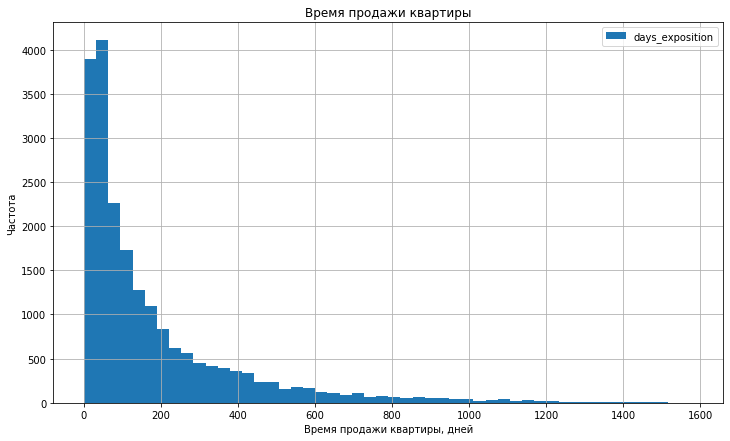

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
#Построим гистограмму времени продажи квартир
df.plot(y = 'days_exposition', title = 'Время продажи квартиры', kind = 'hist', bins = 50, grid = True, figsize = (12,7))

plt.ylabel('Частота')
plt.xlabel('Время продажи квартиры, дней')
plt.show()
#Изучим время продажи квартир
df['days_exposition'].describe()

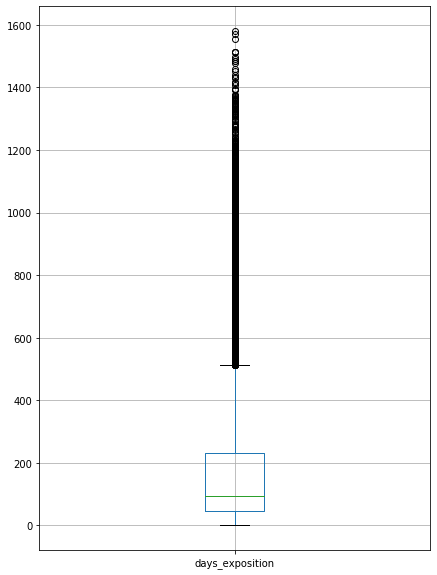

In [29]:
#Диаграмма размаха
df.boxplot('days_exposition', figsize = (7,10))

Гистограмма времени продажи квартир напоминает распределение Пуасона В среднем квартиры были проданы в течении 180 дней, медианное значение равно 95 дней. Редкие количество продаж наблюдаются на значениях более 1200 дней, что считается долгим. Быстрими считаются продажи выполненые мене чем за 45 деней. 

* Уберём редкие и выбивающиеся значения

Редкие и выбивающиеся значения были замечены в следующих столбцах: rooms, ceiling_height, floors_total и total_area. Выбивающиеся значения в этих сталбцах были аномально высокими или низкими, что является бессмысленным, например, число комнат равное 0, высота потолков равное 20 метрам и т.д. Также ограничим максиамльную цену квартир до 40 млн, т.к. более дорогие объявления редкие и из-за того, что сущесутвет больщой разрыв с больщенством значений результаты исследования могут быть искажены.

In [30]:
#Срез данных методом query()
df_sort = (df
.query('0 < rooms < 7 and 2.5 <= ceiling_height <= 4.5 and 0.5 <= last_price < 40 and floors_total < 40 and total_area < 500')
          )

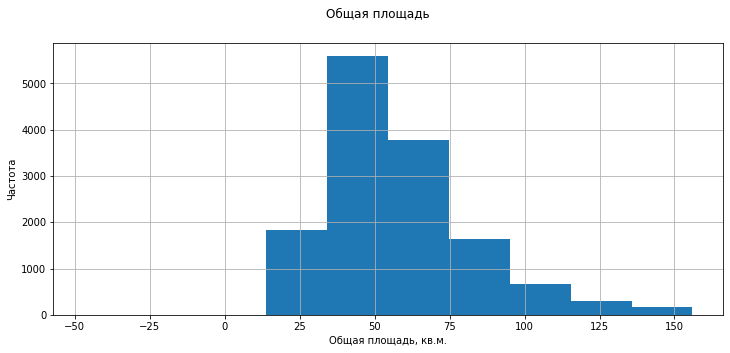

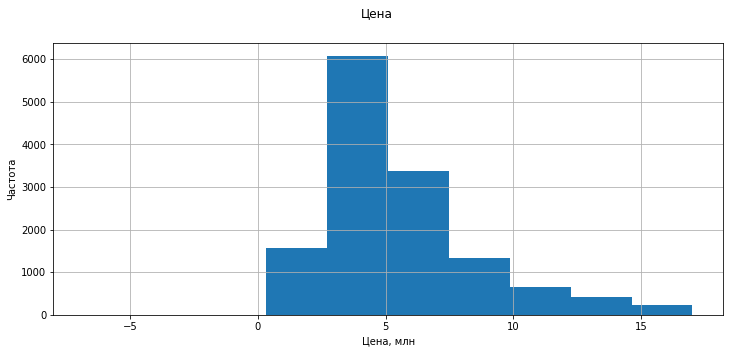

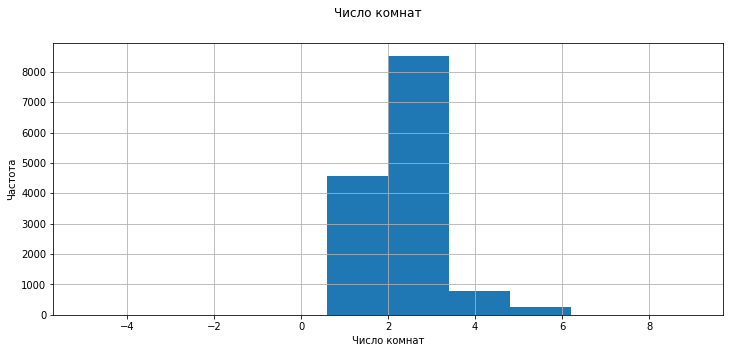

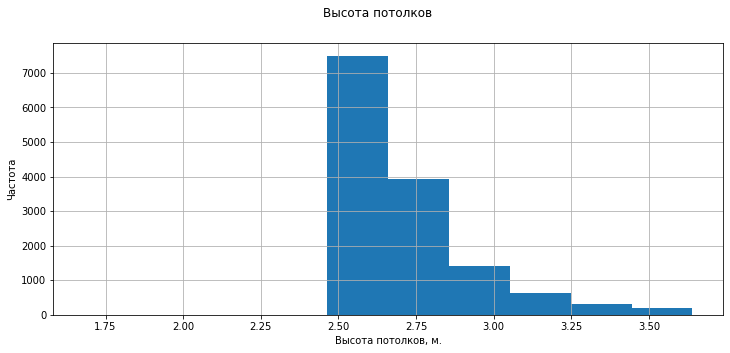

In [31]:
#Цикл графиков
def range_hist_sort(research_group):
    q1 = df[research_group].quantile(0.25)
    q3 = df[research_group].quantile(0.75)
    iqr = q3 - q1
    return df_sort[research_group].hist(range=(q1-3*iqr, q3+3*iqr), 
                                   bins = (10), figsize = (12,5))
i = 0
for research_group in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    range_hist_sort(research_group)
    plt.suptitle(name[i])
    plt.ylabel('Частота')
    plt.xlabel(xname[i])
    i +=1
    plt.show()

Убрав редкие и выбивающиеся значения гистограммы более приближены к распределению Пуасона, а также на графиках нет всплесков значений.

* Факторы влияния на стоимость квартиры

Зависимость цены от площади, числа комнат, удалённости от центра

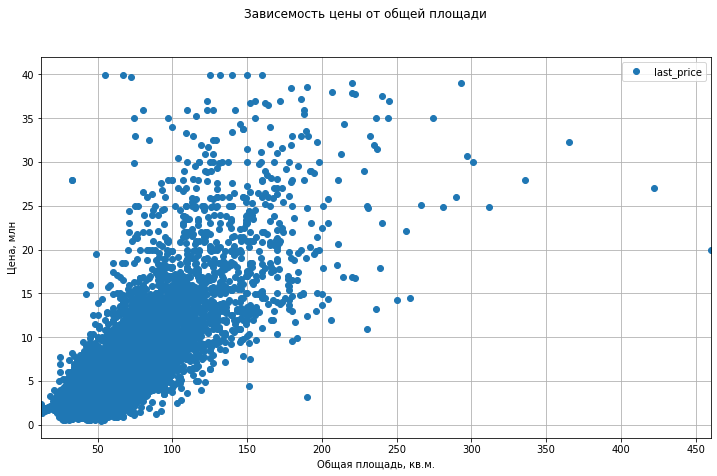

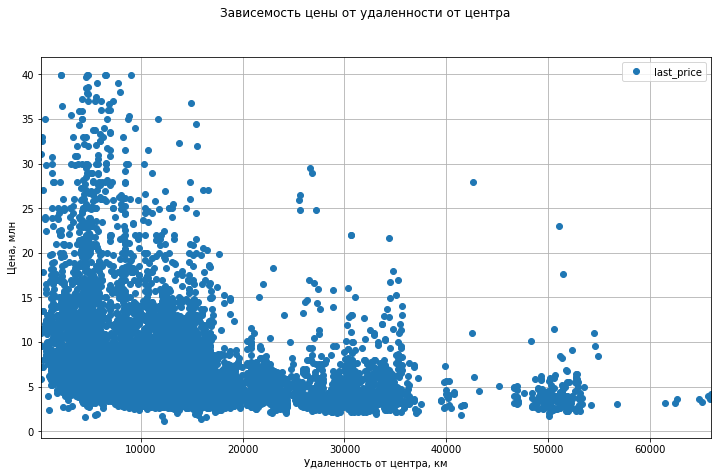

In [32]:
#Цикл графиков зависимости от цены полщади, числа комнат, растояния до центра
i = 0
name1 = ['Зависемость цены от общей площади','Зависемость цены от удаленности от центра']
xname1 = ['Общая площадь, кв.м.','Удаленность от центра, км']
for research_group in ['total_area','cityCenters_nearest']:
    (df_sort
    .plot(x = research_group, y = 'last_price', style='o',grid=True
          , figsize=(12,7))
    )
    plt.suptitle(name1[i])
    plt.ylabel('Цена, млн')
    plt.xlabel(xname1[i])
    i+=1
    plt.show()

По графику общей площади видно, что болщая часть квартир имеют площадь до 200 кв.м. и продаются по цене до 5 млн. В целом при увелечении площади цена равномерно увеличевается.

Из графика отнашения цены к растоянию квартиры до центра, следует, что больщенство квартир в объявлении расположены ближе к центру. Цена в левой части графика быстро снижается, а в левой части цена практически не меняется, т.е. далеше от центра располжена квартира, тем дешевле она стоит. 

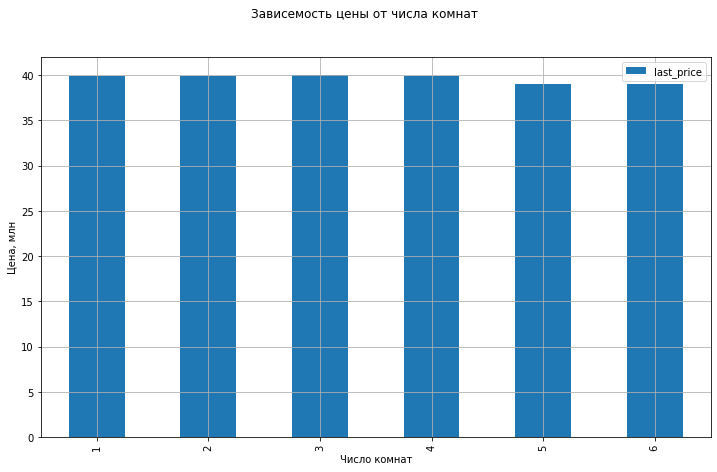

In [33]:
#Столбчатый график отнашения цены от числа комнат
(df_sort
 .pivot_table(index='rooms',values='last_price', aggfunc='max')
 .sort_values('rooms')
 .plot.bar(grid = True, figsize=(12,7))
)
plt.suptitle('Зависемость цены от числа комнат')
plt.ylabel('Цена, млн')
plt.xlabel('Число комнат')
plt.show()

In [34]:
#Поссчитаем коэффициент корреляции
df_sort['last_price'].corr(df_sort['rooms'])

0.5004273648959284

По график зависемости цены от числа комнат видно, что максимальная цена для всех домов с определенным числом комнат проктически одинакова. Коэффициент корреляции Пирсона показывает слабую зависимость цены от числа комнат.

Зависимость цены от расположения квартиры на определеном этаже

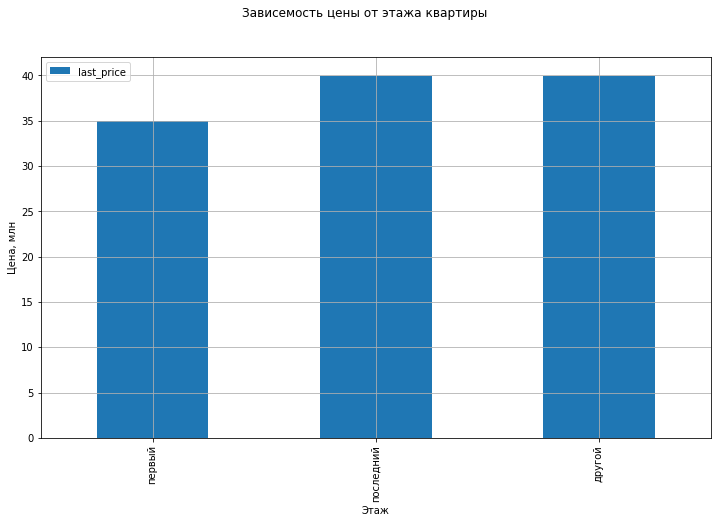

In [35]:
#Столбчатый график отнашения цены от расположения квартиры на определеном этаже
(df_sort
 .pivot_table(index='floor_category',values='last_price', aggfunc='max')
 .sort_values('last_price')
 .plot.bar( grid = True, figsize=(12,7))
)
plt.suptitle('Зависемость цены от этажа квартиры')
plt.ylabel('Цена, млн')
plt.xlabel('Этаж')
plt.show()

Столбчатый график зависемости цены от расположения квартиры на определеном этаже показывает максимальную цену за квартиру. Дешевле продаются квартиры на первом этаже, на последнем и остальных этажах жилплощадь стоит дороже.

Зависимость от даты размещения

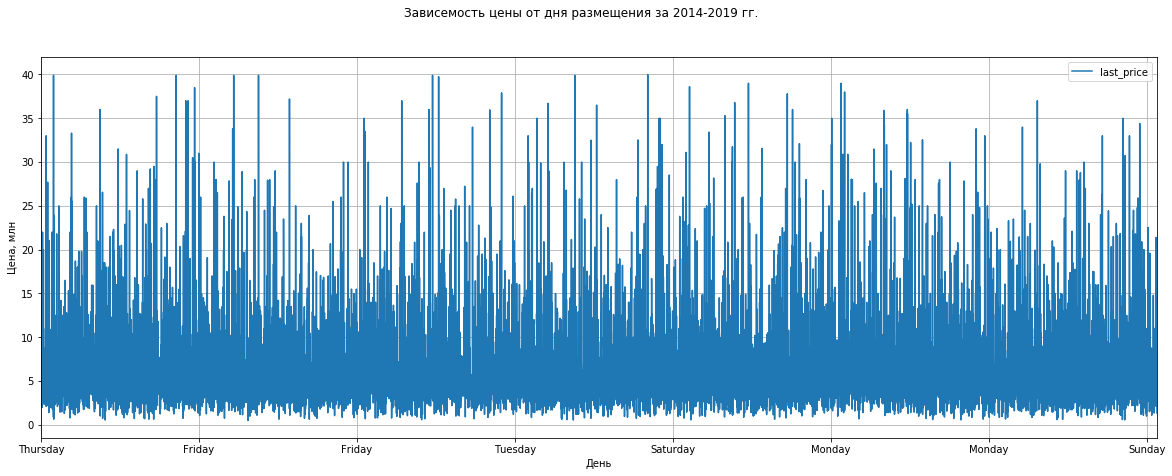

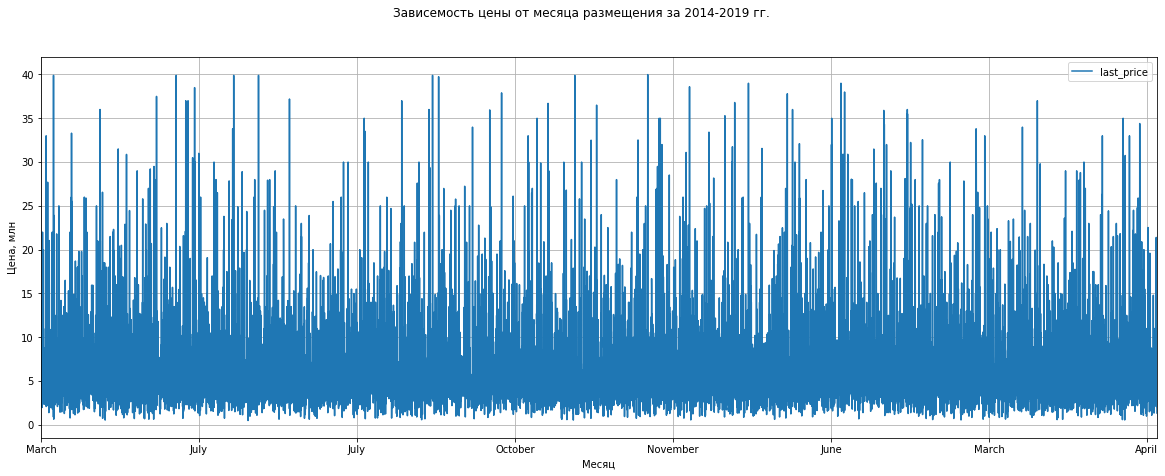

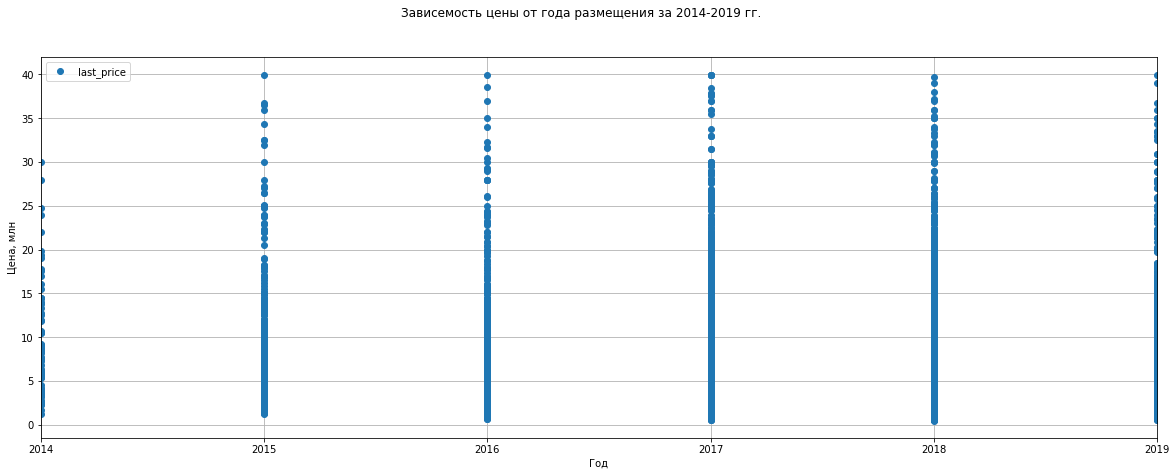

In [36]:
#Цикл графиков зависимости цены от дня и месяца размещения
name2 = ['Зависемость цены от дня размещения за 2014-2019 гг.', 'Зависемость цены от месяца размещения за 2014-2019 гг.']
xname2 = ['День','Месяц']
i=0
for research_group in ['day','month']:
    (df_sort
    .plot(y = 'last_price', x = research_group,style='-',grid=True, figsize=(20,7))
    )
    plt.suptitle(name2[i])
    plt.ylabel('Цена, млн')
    plt.xlabel(xname2[i])
    i+=1
    plt.show()
#График зависимости цены от года размещения
df_sort.plot(x = 'year', y = 'last_price',style='o',grid=True, figsize=(20,7))
plt.suptitle('Зависемость цены от года размещения за 2014-2019 гг.')
plt.ylabel('Цена, млн')
plt.xlabel('Год')
plt.show()

График отнащения цены от дня и месяца размещения объявления идентичны, здесь цена квартиры в любой день или месяц примерно одинаковый и имеет отделные всплески. На графике зависемости цены от года размещения объявления также практически неизменна, только после 2014 года начали появлятся объявлений с высокой ценой. Т.е. зависемости цены от даты размещения объявлений нет.

Распределение объявлений: по годам, месяцам, дням, типу этажей

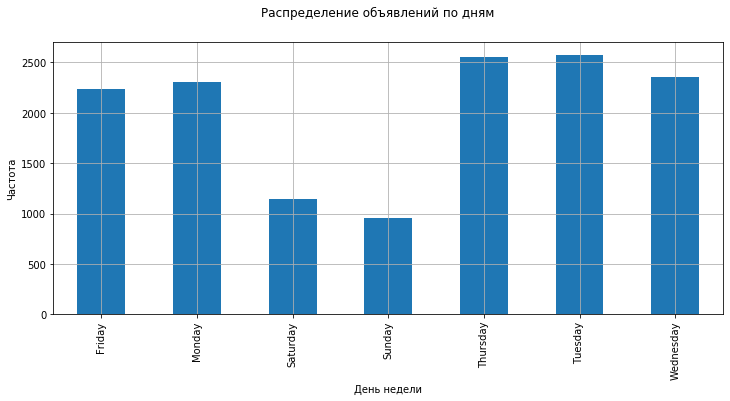

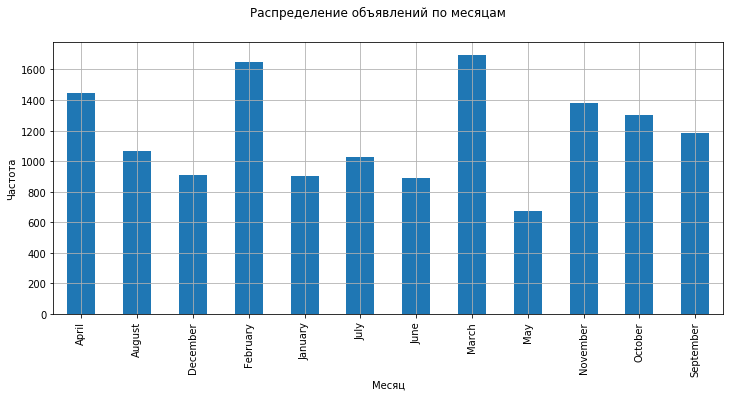

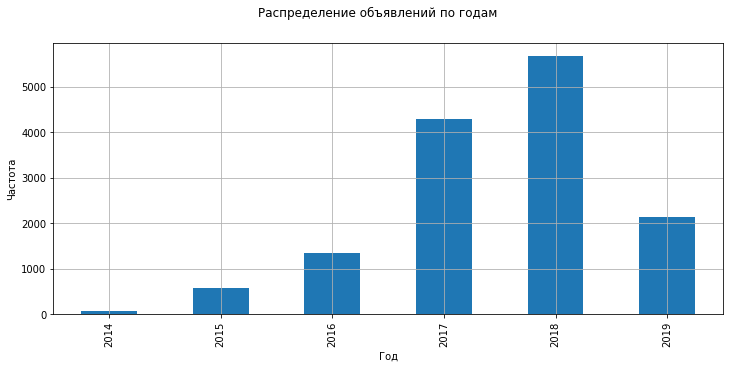

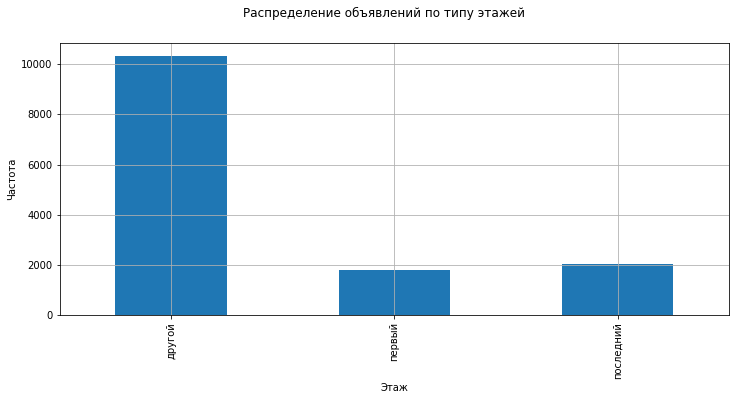

In [37]:
i = 0
name3 = ['Распределение объявлений по дням', 'Распределение объявлений по месяцам', 'Распределение объявлений по годам', 'Распределение объявлений по типу этажей' ]
xname3 = ['День недели', 'Месяц', 'Год', 'Этаж']
for row in ['day','month','year','floor_category']:
    df_sort[row].groupby(df_sort[row]).count().plot.bar(grid=True, figsize =  (12,5))
    plt.suptitle(name3[i])
    plt.ylabel('Частота')
    plt.xlabel(xname3[i])
    i += 1
    plt.show()

По графику распределения объвлений по дням, следует, что больше всего объявлений опубликованы в будние дни, а в выходные меньше.

По графику распределения объявлений по месяцам, следует, что больше всего объявлений опубликованы в феврале и марте, а меньше всего в мае.

По графику распределения объявлений по годам, следует, что с каждом число объявлений росло и лишь в 2019 году число объявлений сильно снизилось по сравнению с предыдущим годом.

По графику распределения объявлений по типу этажа, слудует, что число объявлений на первом и последнем этажах примерно одинаково мала по сравнению с числом объвялений на остальных этажах.

* 10 населенных пунктов с наибольшим числом объявлений 

In [38]:
#Групперовка данных 
df['id'] = df.index

top10_grouped = (df
              .pivot_table(index='locality_name',values='id',aggfunc=['count','mean'])
                )
top10_grouped.columns = ['count', 'price_per_sq_m']
top10_grouped = top10_grouped.query('count > 236').sort_values('count', ascending = False)

In [39]:
top10_grouped

,count,price_per_sq_m
locality_name,,
Санкт-Петербург,15721,11838.159786
Мурино,590,12017.913559
Кудрово,472,11876.370763
Шушары,440,11341.431818
Всеволожск,398,12526.902010
Пушкин,369,11831.395664
Колпино,338,12089.683432
Парголово,327,11003.743119
Гатчина,307,11368.697068


In [40]:
print('Наименьшая цена за кв.м. равна {:.2f} и замечена в населенном пункте {}.'
      .format(top10_grouped['price_per_sq_m'].min(), 'Парголово'))
print('Наибольшая цена за кв.м. равна {:.2f} и замечена в населенном пункте {}.'
      .format(top10_grouped['price_per_sq_m'].max(), 'Всеволожск'))

Наименьшая цена за кв.м. равна 11003.74 и замечена в населенном пункте Парголово.
Наибольшая цена за кв.м. равна 12526.90 и замечена в населенном пункте Всеволожск.


* Квартиры Санкт-Петербурга

Выделим сегмент квартир в Санкт-Петербурге и опрделим квартиры расположенные в центре по графику отнашения цены квартиры за км от растояния до центра в км.

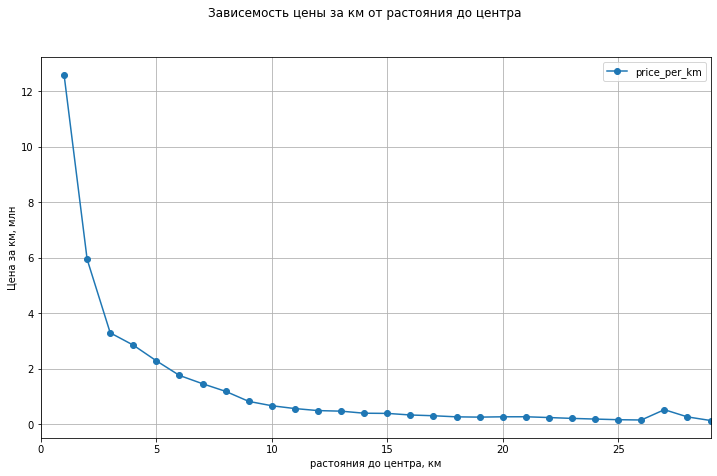

In [41]:
#Выделение квартир расположенных в Санкт-Петербурге
spb_local = df_sort.query('locality_name == "Санкт-Петербург"').reset_index()
spb_local['destance_to_centr_km'] = np.round(spb_local['cityCenters_nearest']/1000)
spb_local['price_per_km'] = spb_local['last_price']/spb_local['destance_to_centr_km']
#График зависимости цены за км от растояния до центра в км. 
(spb_local
 .pivot_table(index='destance_to_centr_km', values='price_per_km', aggfunc='mean')
 .plot(style='-o', grid=True, figsize = (12,7)))
plt.suptitle('Зависемость цены за км от растояния до центра')
plt.ylabel('Цена за км, млн')
plt.xlabel('растояния до центра, км')
plt.show()

По графику выше видно, что сразу после первого километра цена квартир резко снижается, т.е квартиры со значением стоблбца cityCenters_nearest равным 1 км ноходятся в центре. Также из графика следует, что до растоянии в 8 км цена квартир быстро снижается, а после 8 км график стримится к плато. 

* Сегмент квартир в центре

In [42]:
#Выделение квартир расположенных в центре Санкт-Петербурга
centr = spb_local.query('cityCenters_nearest < 2000').reset_index()

Анализ параметров площади, цены, числа комнат и высоты потолков 

In [43]:
#Анализ площади, цены, числа комнат и высоты потолков методом discribe()
centr[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,198.000000,198.000000,198.000000,198.000000
mean,90.969697,12.295657,3.010101,3.199899
std,37.089809,6.383153,1.157583,0.387910
min,12.000000,2.400000,1.000000,2.500000
25%,66.000000,8.000000,2.000000,2.970000
50%,83.500000,10.900000,3.000000,3.200000
75%,110.000000,14.000000,4.000000,3.500000
max,297.000000,35.000000,6.000000,4.500000


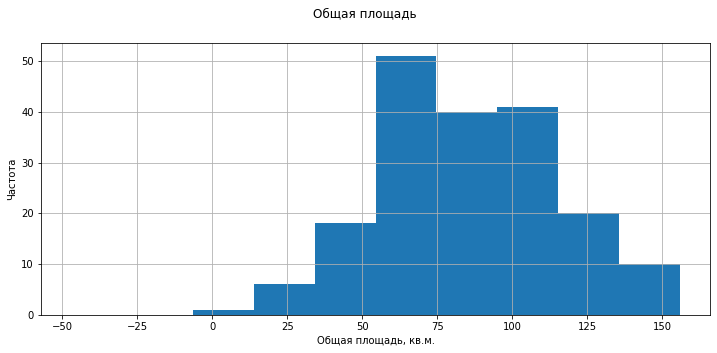

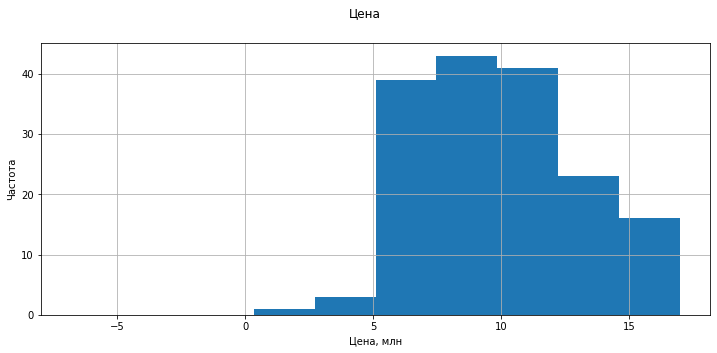

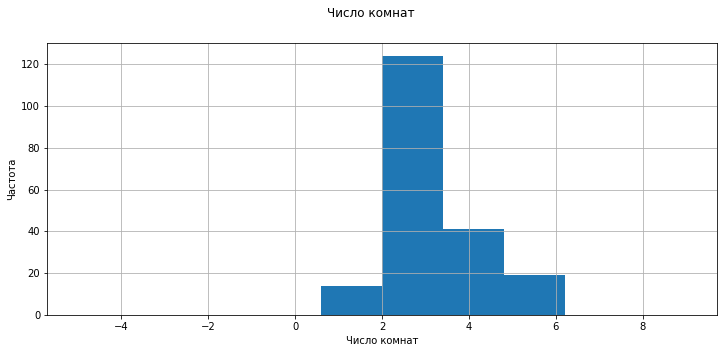

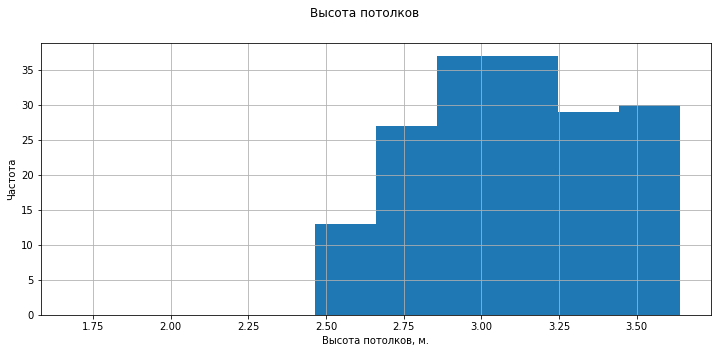

In [44]:
#Цикл графиков
def range_hist_centr(research_group):
    q1 = df[research_group].quantile(0.25)
    q3 = df[research_group].quantile(0.75)
    iqr = q3 - q1
    return centr[research_group].hist(range=(q1-3*iqr, q3+3*iqr), 
                                   bins = (10), figsize = (12,5))
i = 0
for research_group in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    range_hist_centr(research_group)
    plt.suptitle(name[i])
    plt.ylabel('Частота')
    plt.xlabel(xname[i])
    i +=1
    plt.show()

Гистограммы квартир в центре Санкт-Петербурга отличны от гистограмм всех населенных пунктов тем, что здесь график скошен вправо.

Факторы влияющие на стоимость квартиры

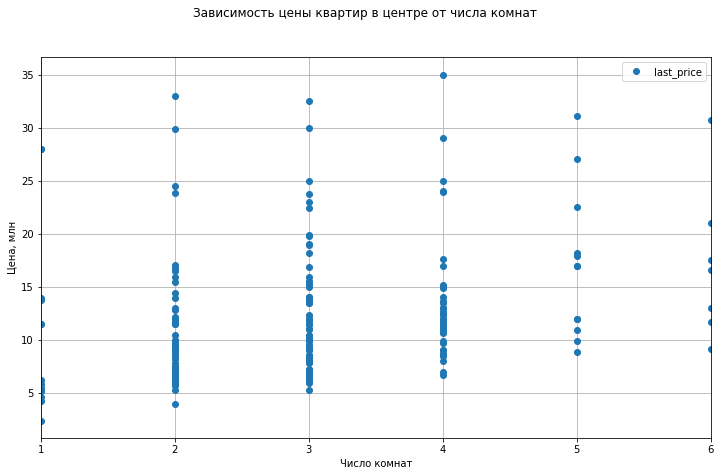

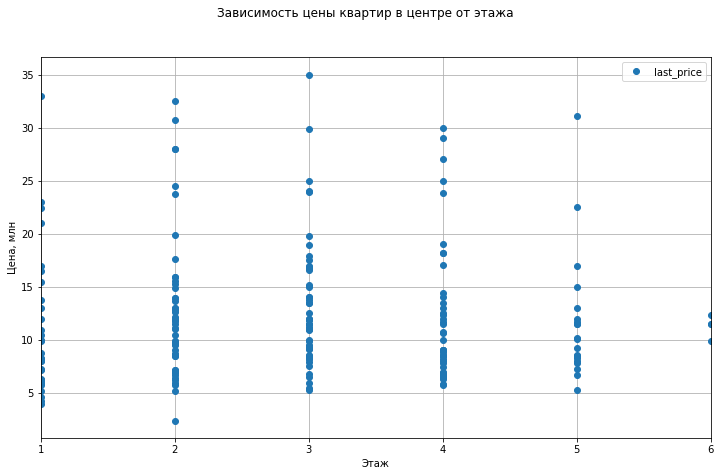

In [45]:
#Цикл графиков
name3 = ['Зависимость цены квартир в центре от числа комнат','Зависимость цены квартир в центре от этажа']
xname3 = ['Число комнат','Этаж']
i = 0
for research_group in ['rooms','floor']:
    (centr
     .plot(x = research_group, y = 'last_price', style='o',grid=True
          , figsize=(12,7))
    )
    plt.suptitle(name3[i])
    plt.ylabel('Цена, млн')
    plt.xlabel(xname3[i])
    i +=1
    plt.show()

In [46]:
#Поссчитаем коэффициент корреляции цены от числа комнат
centr['last_price'].corr(centr['rooms'])

0.2823561815761828

In [47]:
#Поссчитаем коэффициент корреляции цены от этажа
centr['last_price'].corr(centr['floor'])

0.013404749250882881

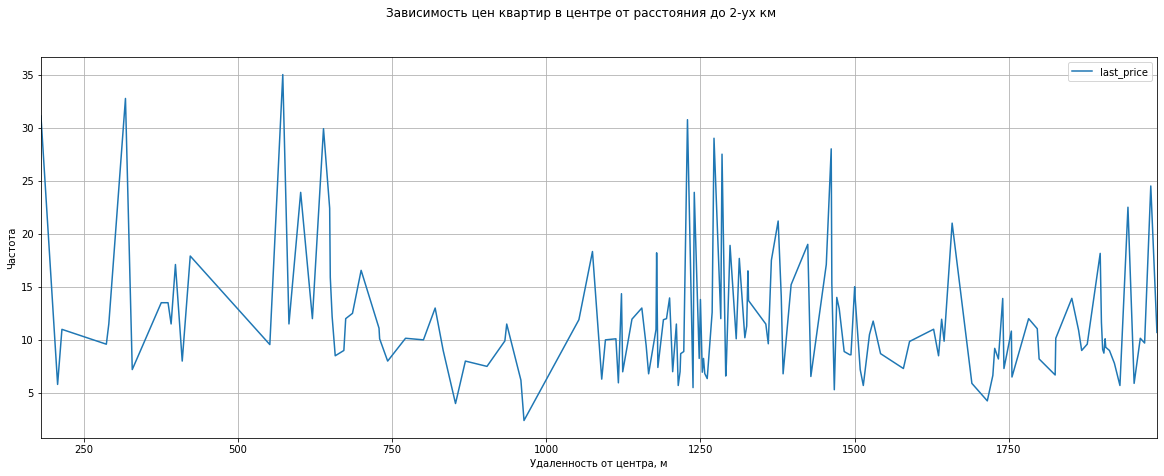

In [48]:
#График удаллености от центра
(centr
     .pivot_table(index='cityCenters_nearest', values='last_price')
     .plot(style='-',grid=True, figsize=(20,7))
    )
plt.suptitle('Зависимость цен квартир в центре от расстояния до 2-ух км')
plt.ylabel('Частота')
plt.xlabel('Удаленность от центра, м')
plt.show()

In [49]:
#Поссчитаем коэффициент корреляции цены от удаллености от центра
centr['last_price'].corr(centr['cityCenters_nearest'])

-0.18416511925718654

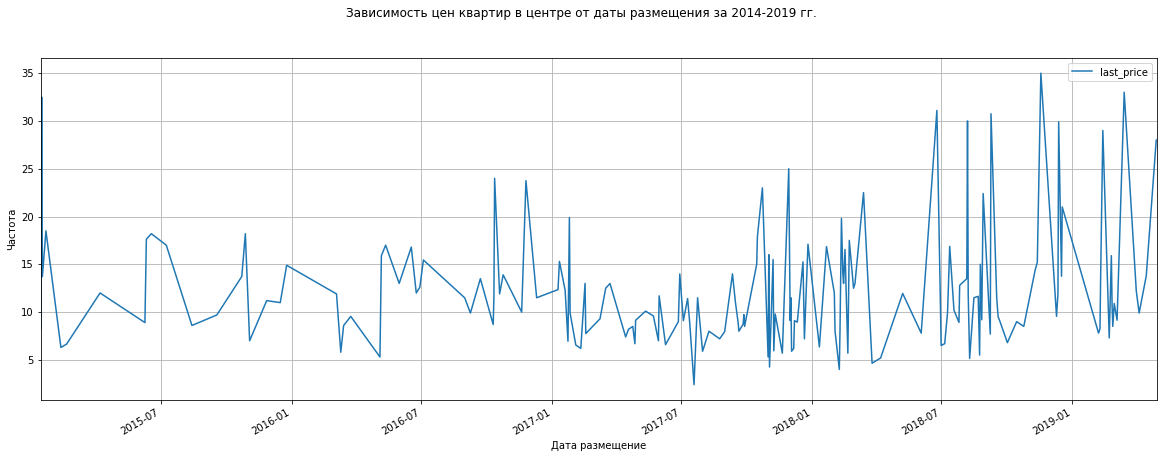

In [50]:
#График даты размещеня
(centr
     .pivot_table(index='first_day_exposition', values='last_price')
     .plot(style='-',grid=True, figsize=(20,7))
    )
plt.suptitle('Зависимость цен квартир в центре от даты размещения за 2014-2019 гг.')
plt.ylabel('Частота')
plt.xlabel('Дата размещение')
plt.show()

По графикам влияния на цену квартир в центре от параметров число комнат, расположения на определенном этаже, удаленности от центра и даты размещения и их и каоэффицентам корреляции, следует, что зависимости на цену в центре от данных параметров практически нет.

### Шаг 5. Общий вывод<a id="conclusion"></a>

В ходе выполнения проекта проведено исследование объявлений о продаже квартир.

Перед проведением исследования данных было произведено первичное изучение файла, в ходе которого выявлены пропуски, различия типов данных и наличия дубликатов. При дальнейшей предобработки данных осуществлены следующие действия:
* выявлены пропуски данных в таблице методом isnull();
* пропуски данных заменены нулями в столбцах balcony, parks_around3000, ponds_around3000; 
* значения типов данных переведены из float в int, столбец first_day_exposition переведен из object в datetime64[ns];
* в столбце locality_name выялены и удалены все дубликаты.

Посчитаны и добавлены в таблицу:
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* котигоризация этажей квартры;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

В ходе проведения исследовательского анализа данных по объявления о прадаже квартир были выдвенуты следующие заключения: 
* Больше всего квартир продано с площадью равной 52 кв.м., с ценой равной 4.65 млн., числом комнат равным 2-м и высотой потолков равной 2.65 м;
* В среднем квартиры были проданы в течении 180-ти дней, чаще всего квартиры продавались за 95 дней, долгими считаюся квартиры проданные за 500 дней, быстрые - за 1 день;
* Уберав редкие и выбивающиеся значения на графиках теперь не встречаются значения являющеюся неверными;
* факторы площади и растояния до центра больше всего влияют на стоимость квартиры. С увлечением площади увеличением площади ростет цена, с увелечением растояния до центра цена снижается. Число комнат не сильно влияет на цену. Расположенные на первом этаже квартиры продаются чуть дещевле, чем кварты на средних или последних этажах. Зависемости цены от даты размещения объявлений нет;
* Наименьшая цена за кв.м. равна 11003.74 и замечена в населенном пункте Парголово. Наибольшая цена за кв.м. равна 12526.90 и замечена в населенном пункте Всеволожск;
* Квартиры в центре на много дороже квартир вокруг центра. Цены запределами 8 км от центра почти одинаковые;
* Распределение факторов площади, цены, числа комнат и высоты потолков сегмента квартир в центре отличается смещенно в правую сторону в отличеии от распределения всех квартир;
* Цена квартир в центре практически не зависят от числа комнат, этажа, удалённости от центра и дата размещения объявления.
